In [3]:
import gymnasium as gym
import foraging_envs
from torch import nn
from convert_net import *
from stable_baselines3 import DQN
import os

from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import plot_results,  ts2xy

from stable_baselines3.common.callbacks import BaseCallback

In [16]:
log_dir = "Saved Models/dqn_foraging_monitor"

In [4]:
#os.makedirs(log_dir, exist_ok=True)

env = gym.make("foraging_envs/foraging-two", episode_length = 100, flower_distribution = "uniform", decay_parameter = .25, travel_time = 2, render_mode = "human")
#env = Monitor(env, log_dir)

In [44]:
# to update any changes made to the .py file 
%run convert_net.py

In [6]:
net_arch = [64, 64]
activation_fn = nn.ReLU
policy_kwargs = dict(net_arch = net_arch, activation_fn = activation_fn)

# learning stuff
# callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
model = DQN("MlpPolicy", env, verbose=1, policy_kwargs = policy_kwargs)
model.learn(total_timesteps=12000, progress_bar=True, log_interval=4)


net1 = model.get_parameters()  # This will print the parameters of the model


## Here, make a copy network so that we can find the activations inside the network 
# find parameters to put into our copy network
state, info = env.reset()
n_observations = len(state)

network_copy_args = dict(obs_space = n_observations, action_space =env.action_space.n, net_arch = net_arch, activation_fn = activation_fn)
network_copy = CustomNetwork(network_copy_args)
network_copy = copy_weights(from_net=model, to_net = network_copy)



vec_env = model.get_env()
# Save the model
# model.save("Saved Models/dqn_foraging", include = ["env"])

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\nicla\OneDrive\Documents\Reinforcement Learning\.venv\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -5.57    |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 856      |
|    time_elapsed     | 0        |
|    total_timesteps  | 400      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.108    |
|    n_updates        | 74       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 2.64     |
|    exploration_rate | 0.367    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 782      |
|    time_elapsed     | 1        |
|    total_timesteps  | 800      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0254   |
|    n_updates      

In [ ]:
print(network_copy.

TypeError: Module.type() missing 1 required positional argument: 'dst_type'

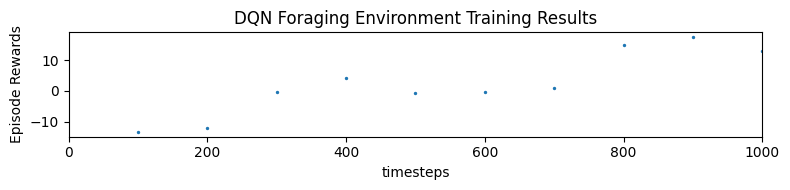

In [31]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results(
    [log_dir], 1000, results_plotter.X_TIMESTEPS, "DQN Foraging Environment Training Results"
)


In [48]:
del  model
model = DQN.load("Saved Models\dqn_foraging")

vec_env = model.get_env()

obs = vec_env.reset()

#for i in range(20000):
#    action, _state = model.predict(obs, deterministic=True)
#    obs, reward, done, info = vec_env.step(action)
#    # vec_env.render("human")
#    # VecEnv resets automatically
#    # if done:
#    #   obs = vec_env.reset()
#    # keep track of rewards throughout an episode 
    
# plot the training results
plot_results(log_dir, 12000, results_plotter_title="DQN Foraging", x_axis="timesteps")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nicla\AppData\Local\Temp\ipykernel_36172\1183754263.py:2: SyntaxWarning: invalid escape sequence '\d'
  model = DQN.load("Saved Models\dqn_foraging")
C:\Users\nicla\AppData\Local\Temp\ipykernel_36172\1183754263.py:2: SyntaxWarning: invalid escape sequence '\d'
  model = DQN.load("Saved Models\dqn_foraging")


NameError: name 'model' is not defined

Text(0.5, 1.0, 'Episode Lengths Over Time')

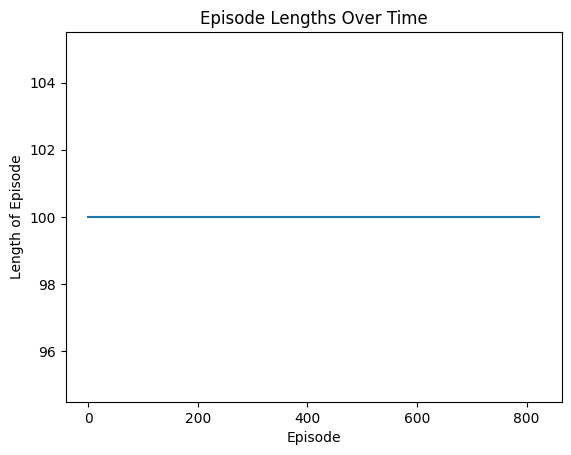

In [53]:

# plot the list of lengths 
import matplotlib.pyplot as plt

plt.plot([len(x) for x in vec_env.get_attr("reward_hist_all_ep")[0][:]])
plt.xlabel("Episode")
plt.ylabel("Length of Episode")
plt.title("Episode Lengths Over Time")

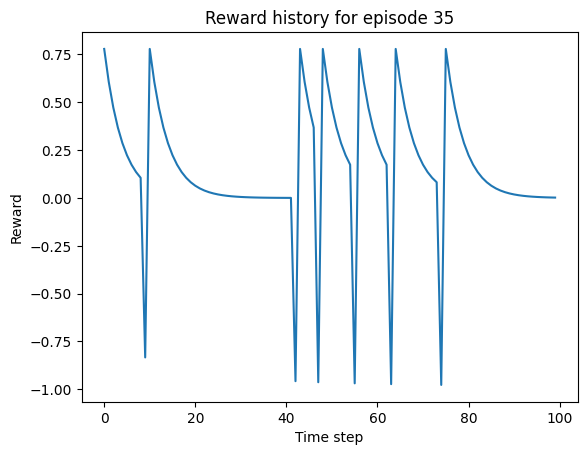

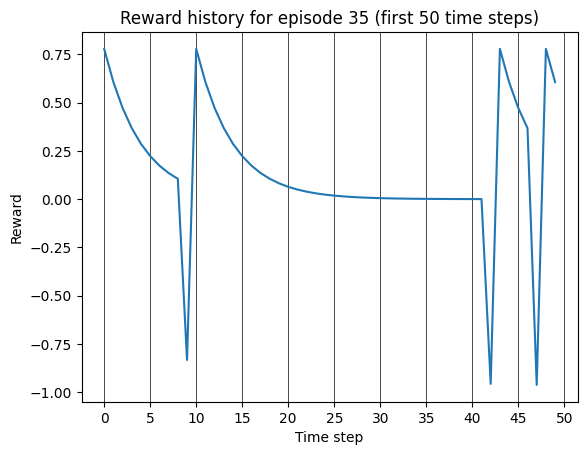

In [52]:
# plot the reward history from the first episode 
import matplotlib.pyplot as plt
import numpy as np

num_show = 50
which_episode = 35  # Change this to plot a different episode

reward_hist = vec_env.get_attr("reward_hist_all_ep")[0][which_episode]
reward_hist = np.array(reward_hist)
plt.plot(reward_hist)
plt.title(f"Reward history for episode {which_episode}")
plt.xlabel("Time step")
plt.ylabel("Reward")
plt.show()

# now plot the reward history from the first episode, only the first 100 time steps
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(reward_hist[:num_show])
plt.title(f"Reward history for episode {which_episode} (first {num_show} time steps)")
plt.xlabel("Time step")
plt.ylabel("Reward")
# add graph paper like lines to the grid
major_ticks = np.arange(0, num_show+1, 5)

ax.set_xticks(major_ticks) 
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black', axis='x')
plt.show()



Notes: 

Should prbably keep track of "c" history- it seems to always be .2 ish

As the episode goes on, it exploits more an more- see if this changes with longer travel time? If the c function is broken, changing this shouldnt do anything 

c is only used right after the agent chooses to leave 

Updates: 

The exponential decay is correct- we were reading it wrong 

I think the use of sight lines if the next step to including a travel time (tube idea) 

